In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Modelling
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error,mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostClassifier
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

import warnings



In [32]:
df=pd.read_csv('C:/datascience/new_dataset.csv')
df.head()

,gender,logical reasoning,learning style,stress level,tutions,math score,reading score,writing score
0,female,average,auditory learning,medium,self study,72,72,74
1,female,very strong,kinesthetic learning,medium,tutor,69,90,88
2,female,average,solitary learning,medium,self study,90,95,93
3,male,very weak,reading/writing learning,high,self study,47,57,44
4,male,very strong,kinesthetic learning,medium,self study,76,78,75


# Preparing X and Y variables 

In [57]:
x= df.drop(columns=['math score'],axis=1)

In [58]:
y=df['math score']

In [59]:
num_features=x.select_dtypes(exclude='object').columns
cat_features=x.select_dtypes(include='object').columns
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
ohe_transformer= OneHotEncoder()
preprocessor = ColumnTransformer(
    [ 
        ('OneHotEncoder',ohe_transformer,cat_features),
        ('StandardScaler',numeric_transformer,num_features)

])

In [60]:
x= preprocessor.fit_transform(x)

In [61]:
x.shape

(1000, 19)

In [62]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

# Create an evaluate function to give all metrics after model training

In [63]:
def eval_func(true,predicted):
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    rmse=np.sqrt(mean_squared_error(true,predicted))
    r2_scr= r2_score(true,predicted)
    return mae,rmse,r2_scr


In [64]:
models = {
            "Lasso": Lasso(),
            "KNeighborsRegressor": KNeighborsRegressor(),
            "DecisionTreeRegressor": DecisionTreeRegressor(),
            "RandomForestRegressor": RandomForestRegressor(), 
            "AdaBoostClassifier": AdaBoostClassifier(),
            "SVR": SVR(),
            "LinearRegression": LinearRegression(),
            "Ridge":Ridge(),
            "Lasso": Lasso(),
            "CatBoostRegressor": CatBoostRegressor(verbose=False),
            "XGBRegressor": XGBRegressor()
}
model_List =[]
r2_List =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    #Train model
    model.fit(X_train,Y_train)
    #Make predictions
    y_train_pred = model.predict(X_train)
    Y_test_pred = model.predict(X_test)
    #Evaluate train and test dataset
    mae_train, rmse_train, r2_score_train = eval_func(Y_train,y_train_pred)
    mae_test, rmse_test, r2_score_test = eval_func(Y_test,Y_test_pred)

    print(list(models.keys())[i])
    model_List.append(list(models.keys())[i])

    print("Model performance for training set")
    print("- Root mean squared error :{:.4f}".format(rmse_train))
    print("- Mean absolute error :{:.4f}".format(mae_train))
    print("- R2 score :{:.4f} ".format(r2_score_train))

    print("---------------------------------------------")

    print("Model performance for testing set")
    print("- Root mean squared error :{:.4f}".format(rmse_test))
    print("- Mean absolute error :{:.4f}".format(mae_test))
    print("- R2 score :{:.4f}".format(r2_score_test))
    r2_List.append(r2_score_test)
    
    print('-------------------------------------------------')
    print("\n")








Lasso
Model performance for training set
- Root mean squared error :6.5938
- Mean absolute error :5.2063
- R2 score :0.8071 
---------------------------------------------
Model performance for testing set
- Root mean squared error :6.5197
- Mean absolute error :5.1579
- R2 score :0.8253
-------------------------------------------------


KNeighborsRegressor
Model performance for training set
- Root mean squared error :5.7066
- Mean absolute error :4.5137
- R2 score :0.8556 
---------------------------------------------
Model performance for testing set
- Root mean squared error :7.2530
- Mean absolute error :5.6210
- R2 score :0.7838
-------------------------------------------------


DecisionTreeRegressor
Model performance for training set
- Root mean squared error :0.2795
- Mean absolute error :0.0187
- R2 score :0.9997 
---------------------------------------------
Model performance for testing set
- Root mean squared error :8.1096
- Mean absolute error :6.3150
- R2 score :0.7297
--

# Results

In [65]:
pd.DataFrame(list(zip(model_List,r2_List)),columns=['Models','R2 score']).sort_values(by=['R2 score'],ascending=False)

,Models,R2 score
7,Ridge,0.880593
6,LinearRegression,0.878970
3,RandomForestRegressor,0.853395
8,CatBoostRegressor,0.850422
9,XGBRegressor,0.828289
0,Lasso,0.825320
1,KNeighborsRegressor,0.783813
2,DecisionTreeRegressor,0.729739
5,SVR,0.728600
4,AdaBoostClassifier,0.428080


# Linear Regression

In [66]:
lin_model=Ridge(fit_intercept=True)
lin_model=lin_model.fit(X_train,Y_train)
y_pred = lin_model.predict(X_test)
score=r2_score(Y_test,y_pred)*100
print("Accuracy of the model : %.2f" %score)



Accuracy of the model : 88.06


# Plot Y_pred Y_test 

Text(0, 0.5, 'predicted value')

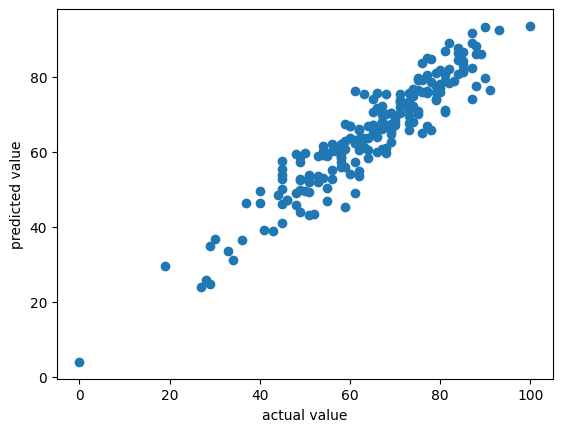

In [67]:
plt.scatter(Y_test,y_pred)
plt.xlabel('actual value')
plt.ylabel('predicted value')

<Axes: xlabel='math score'>

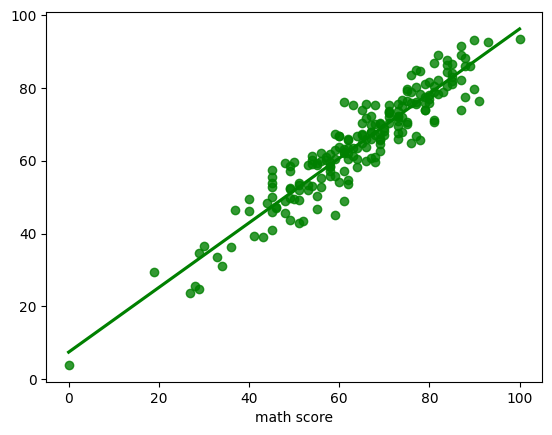

In [68]:
sns.regplot(x=Y_test,y=y_pred,ci=None,color='green')

# Difference between Y_test y_pred

In [69]:
pred= pd.DataFrame({'Actual value':Y_test, 'Predicted value' :y_pred, 'Difference':Y_test-y_pred })
pred.head(10)

,Actual value,Predicted value,Difference
521,91,76.398705,14.601295
737,53,58.842469,-5.842469
740,80,76.992129,3.007871
660,74,76.805898,-2.805898
411,84,87.615387,-3.615387
678,81,78.915450,2.084550
626,69,64.715227,4.284773
513,54,53.044761,0.955239
859,87,74.115900,12.884100
136,51,49.366847,1.633153


In [70]:
df['logical reasoning'].unique()

array(['average', 'very strong', 'very weak', 'strong', 'weak'],
      dtype=object)